# Edge Detection

Contents:
- Sobel Kernel
- Prewitt Kernel

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from skimage import io
from scipy import signal

In [22]:
## FUNCTION DEFINITIONS :: HELPER FUNCTIONS

def threshold_image(image, thr):
    return (image>=thr)*1

def gaussian_filter(image, kernel_size, var):
    m = kernel_size[0]
    n = kernel_size[1]
    gaussian_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            d = (i-m/2)**2 + (j-n/2)**2
            gaussian_matrix[i,j] = np.exp(-d/(2*var**2))

    return signal.convolve2d(image, gaussian_matrix, mode='same', boundary='fill', fillvalue=0)

## Edge Detection

In [9]:
## FUNCTION DEFINITIONS :: EDGE DETECTION

def basic_edges(image, mode='sobel'):
    if mode == 'sobel':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-2.0, 0.0, 2.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -2.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 2.0, 1.0]])

    elif mode == 'prewitt':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -1.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 1.0, 1.0]])

    imgrad_x = signal.convolve2d(image, kernel_x, mode='same', boundary='fill', fillvalue=0)
    imgrad_y = signal.convolve2d(image, kernel_y, mode='same', boundary='fill', fillvalue=0)
    return imgrad_x, imgrad_y

In [31]:
## MAIN :: EDGE DETECTION

image = io.imread('Original-book.png', 0)

var = 5
kernel_size = (5,5)
blur_image = gaussian_filter(image, kernel_size, var)

thr = 0.99*255
sobel_image_x, sobel_image_y = basic_edges(blur_image, 'sobel')
sobel_magnitude = np.sqrt(sobel_image_x**2 + sobel_image_y**2)
sobel_image_x = threshold_image(sobel_image_x, thr)
sobel_image_y = threshold_image(sobel_image_y, thr)
sobel_magnitude = threshold_image(sobel_magnitude, thr)

prewitt_image_x, prewitt_image_y = basic_edges(blur_image, 'prewitt')
prewitt_magnitude = np.sqrt(prewitt_image_x**2 + prewitt_image_y**2)
prewitt_image_x = threshold_image(prewitt_image_x, thr)
prewitt_image_y = threshold_image(prewitt_image_y, thr)
prewitt_magnitude = threshold_image(prewitt_magnitude, thr)

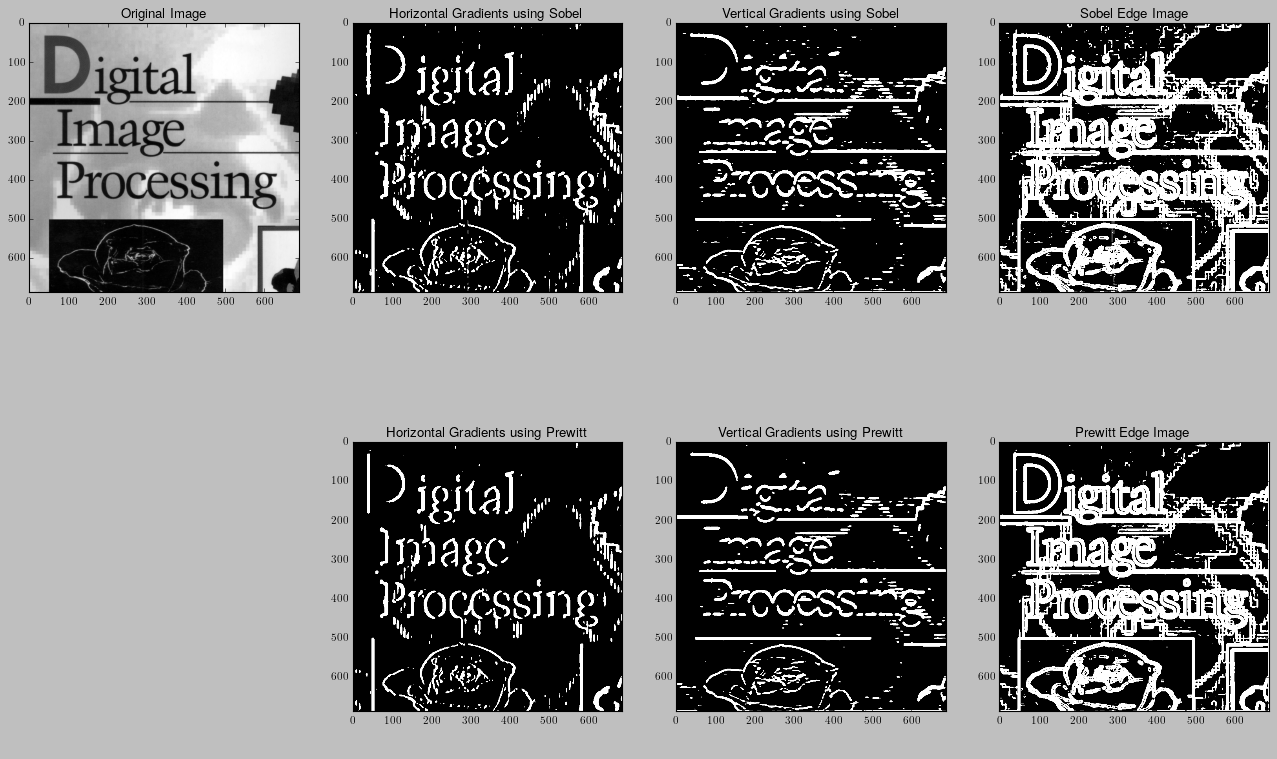

In [33]:
## PLOT :: EDGE DETECTION

style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(2,4,figsize=(20,12))
plts[0][0].imshow(image, cmap='gray')
plts[0][0].set_title(r"Original Image")

plts[0][1].imshow(sobel_image_x, cmap='gray')
plts[0][1].set_title(r"Horizontal Gradients using Sobel")

plts[0][2].imshow(sobel_image_y, cmap='gray')
plts[0][2].set_title(r"Vertical Gradients using Sobel")

plts[0][3].imshow(sobel_magnitude, cmap='gray')
plts[0][3].set_title(r"Sobel Edge Image")

plts[1][0].axis('off')

plts[1][1].imshow(prewitt_image_x, cmap='gray')
plts[1][1].set_title(r"Horizontal Gradients using Prewitt")

plts[1][2].imshow(prewitt_image_y, cmap='gray')
plts[1][2].set_title(r"Vertical Gradients using Prewitt")

plts[1][3].imshow(prewitt_magnitude, cmap='gray')
plts[1][3].set_title(r"Prewitt Edge Image")

plt.show()